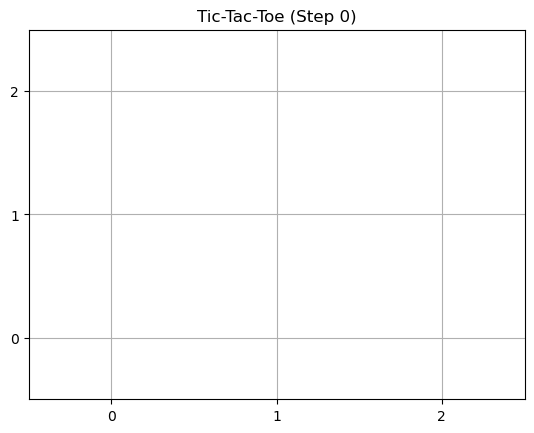

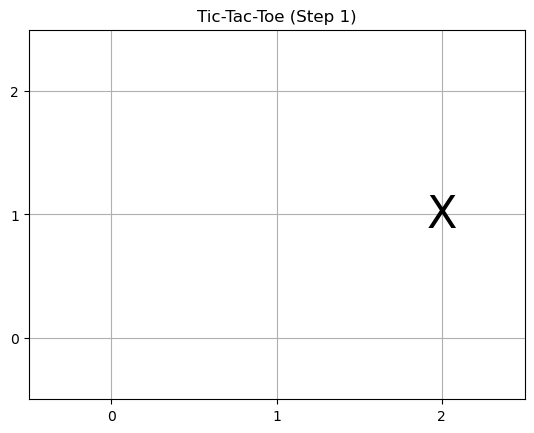

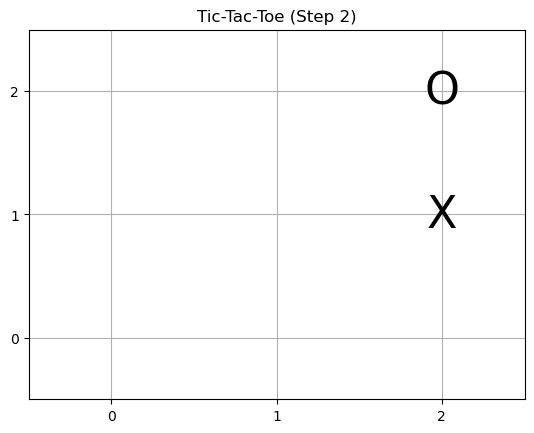

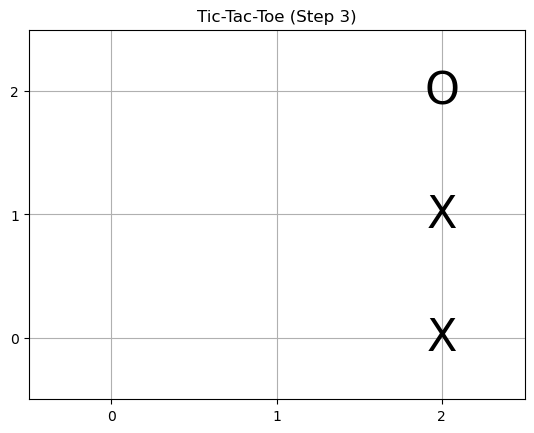

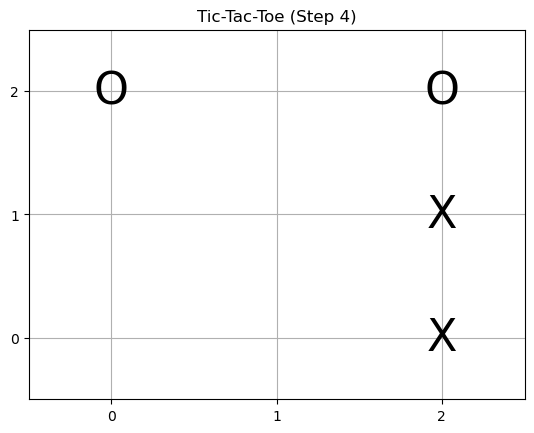

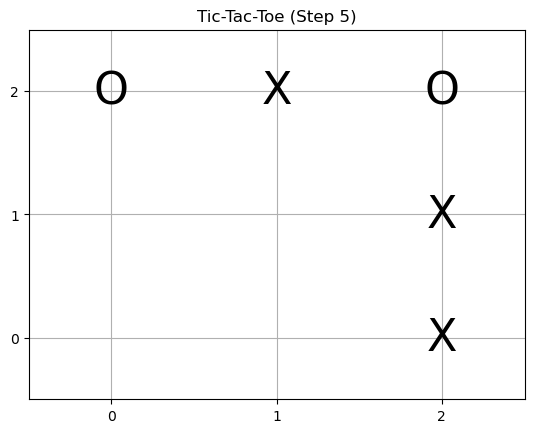

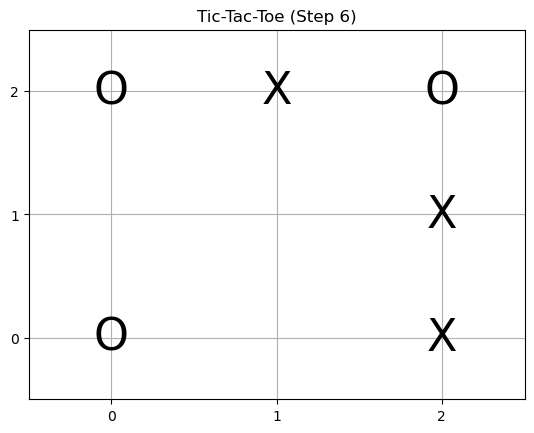

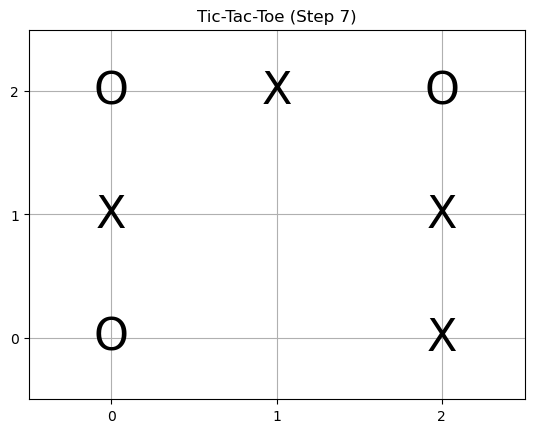

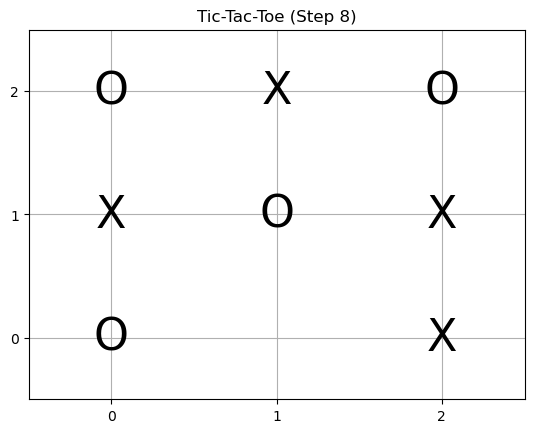

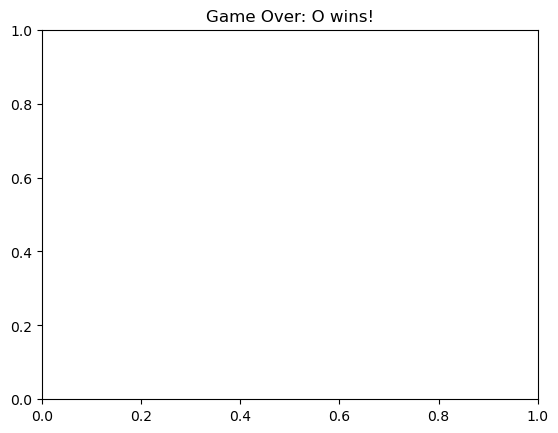

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constants
EMPTY = 0
PLAYER_X = 1  # Human
PLAYER_O = -1  # AI

# Draw board
def draw_board(board, step):
    plt.clf()
    plt.title(f"Tic-Tac-Toe (Step {step})")
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 2.5)
    plt.xticks([0, 1, 2])
    plt.yticks([0, 1, 2])
    plt.grid(True)
    for i in range(3):
        for j in range(3):
            if board[i, j] == PLAYER_X:
                plt.text(j, 2 - i, 'X', fontsize=32, ha='center', va='center')
            elif board[i, j] == PLAYER_O:
                plt.text(j, 2 - i, 'O', fontsize=32, ha='center', va='center')
    plt.pause(0.8)

# Check winner
def check_winner(board):
    for player in [PLAYER_X, PLAYER_O]:
        if any(np.all(board[i, :] == player) for i in range(3)) or \
           any(np.all(board[:, j] == player) for j in range(3)) or \
           np.all(np.diag(board) == player) or \
           np.all(np.diag(np.fliplr(board)) == player):
            return player
    if not np.any(board == EMPTY):
        return 0  # Draw
    return None  # Game continues

# Minimax Algorithm
def minimax(board, is_maximizing):
    winner = check_winner(board)
    if winner is not None:
        return winner  # Return outcome: 1, -1, or 0 (draw)

    best = -np.inf if is_maximizing else np.inf
    for i in range(3):
        for j in range(3):
            if board[i, j] == EMPTY:
                board[i, j] = PLAYER_X if is_maximizing else PLAYER_O
                score = minimax(board, not is_maximizing)
                board[i, j] = EMPTY
                best = max(best, score) if is_maximizing else min(best, score)
    return best

# Best move for AI (O)
def best_move(board):
    best_score = np.inf
    move = None
    for i in range(3):
        for j in range(3):
            if board[i, j] == EMPTY:
                board[i, j] = PLAYER_O
                score = minimax(board, True)
                board[i, j] = EMPTY
                if score < best_score:
                    best_score = score
                    move = (i, j)
    return move

# Simulate a game (AI vs Random X)
def play_game():
    board = np.zeros((3, 3), dtype=int)
    step = 0
    draw_board(board, step)

    while True:
        # Human (X) — random move for demo
        empty = list(zip(*np.where(board == EMPTY)))
        if not empty:
            break
        move = empty[np.random.randint(len(empty))]
        board[move] = PLAYER_X
        step += 1
        draw_board(board, step)

        if check_winner(board) is not None:
            break

        # AI (O) — use minimax
        move = best_move(board)
        if move:
            board[move] = PLAYER_O
            step += 1
            draw_board(board, step)

        if check_winner(board) is not None:
            break

    winner = check_winner(board)
    result = "Draw!" if winner == 0 else ("X wins!" if winner == PLAYER_X else "O wins!")
    plt.title(f"Game Over: {result}")
    plt.show()

# Run it
play_game()
